In [ ]:
"""
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import HuggingFacePipeline
from langchain.chains import LLMChain


1. Are the aims clear and achieved?
4. Are reliable sources of information used? (ie, publication cited, speaker is an orthodontist)
6. Is the information presented balanced and unbiased?
7. Are additional sources of information listed for patient reference?
8. Are areas of uncertainty mentioned?

1. Is the video clear, concise, and understandable?
2. Are valid sources cited?
3. Is the information provided balanced and unbiased?
4. Are additional sources of information listed for patient reference?
5. Does the video address areas of controversy/uncertainty?

model_kwargs = {
    'temperature': 0.1,
    'max_length': 4096,
}

tokenizer = AutoTokenizer.from_pretrained(model_id)

pipe = pipeline(model=model_id,
                task="text-generation",
                tokenizer=tokenizer,
                torch_dtype="auto",      # torch.bfloat16,
                device_map="auto",
                model_kwargs=model_kwargs,
                # quantization_config=bnb_config,
)
                    
hf_pipeline = HuggingFacePipeline(pipeline=pipe)

prompt_with_context = PromptTemplate(
    input_variables=["instruction", "context"],
    template="{instruction}\nTranscript:\n{context}\nTranscript score:"
    )

llm_context_chain = LLMChain(llm=hf_pipeline, prompt=prompt_with_context)
llm_output = llm_context_chain.predict(instruction=instruction, context=context).lstrip()
"""

In [127]:
from collections import Counter
import re

def find_repeated_phrases(text, min_length=4, min_occurrences=2):
    # Split text into sentences
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    
    # Initialize a counter to store occurrences of phrases
    phrase_counter = Counter()
    
    # Iterate through each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()
        
        # Generate all possible phrases longer than min_length words
        for i in range(len(words) - min_length + 1):
            phrase = ' '.join(words[i:i+min_length])
            # Update the counter for this phrase
            phrase_counter[phrase] += 1
    
    # Filter phrases that occur more than min_occurrences times
    repeated_phrases = [phrase for phrase, count in phrase_counter.items() if count > min_occurrences]
    
    return repeated_phrases

# Example usage
text = "Evening guys and welcome back to my channel. And you're probably all wondering, what is Nocturnal Enuresis? Well to put it in basic terms for you to understand, it is called bed wetting. Which obviously involves wetting the bed during the night. Which is something that I have dealt with all my life. So out of 2-3% of people over the age of 18 plus, they suffer with Nocturnal Enuresis. Now there's two types of Nocturnal Enuresis. There is a primary Nocturnal Enuresis and there is also a secondary Nocturnal Enuresis. The short name for Nocturnal Enuresis, instead of saying the long word, is NE. Or for primary Nocturnal Enuresis it's PNE. For secondary SND and so on. Out of 5-10% people, bed wetting is caused by the development of the bladder. It's not necessarily anything to do with medical. Sometimes it can be medical related. Other times it's more found that it's actually family history orientated. So it runs through the bloodline, for example grandparents and grandparents, cousins and so on. Well I'm in the category of the primary, yes, I'm the primary Nocturnal Enuresis. Which means I have never had a prolonged period of having a dry night. I'm wetting the bed every single night, without fail. But if I was a secondary Nocturnal Enuresis, which means I've had a long period of time where I've gone without wetting the bed and then unfortunately I've started again. But in my case I've always wet the bed, I've never had a dry night. So unfortunately it is something that I have dealt with all my life and there has been a lot of help. Over the years of having bed wetting I've been asked what treatments have I used, what therapies have I been recommended and so on and so forth. Well from as far as I can remember when I was younger my doctor told me that I could be prescribed this certain tablet. Now forgive me I don't know what the name of this tablet was, I've forgotten because it was many years ago. And they recommended to my mum that she sits at the end of my bed and watches me just drifting off into her sleep. Well with that she would then have to prescribe me the medication. I'm not 100% keen on that because I'm half asleep, my mum's got to try and wake me up, give me a tablet and then I go back to sleep. So the process of that was pretty awkward, frustrating as such because you just wouldn't want to go to bed. But having to be given it as soon as you go to sleep, that was a bit hard to deal with. My other treatment that I had when I was around about 7, yeah around about 7 I was given the opportunity of trying out the alarm. Well my opinion on the alarm was horrible to be truthfully honest, I don't know what else to say apart from the fact that it was really annoying. It was a little, what can I say, it was like a little pad which would then be attached to a long wire which would then be attached to a little box. That little box would then get clipped to my pyjamas along with the string that would go through my pyjamas and into a pair of underwear with this thing in between. So as soon as a bit of urine of course touches that alarm, it sends the alarm and it starts going off. Which then obviously wakes me up and then I can go to the toilet and finish what my body had started in my sleep. Well after a while that didn't get any useful because I got used to the sound of the alarm. So when I wet I didn't hear it so then my mum would then get woken up by the alarm and then she'd have to come in and tell me. Well the next morning obviously I've woken up dry, not realising that my mum has actually come in, helped me go to the toilet and then I've gone back to bed. So within that time frame I've then woken up and gone, yay I'm dry, I'm dry. When it's like no darling you actually, you know you nearly had the accident but so on and so forth. So that was quite awkward. I have also tried protection as in protective sheets, plastic sheets, also protective dry nights as what they call them. Well they get called different nappies, diapers, dry nights, anything really. I have also tried them which I also tried when I was around 17 to 18. But obviously at that age you're wanting to experience more, go out more so how could I possibly do that with me wearing a nappy? So that was kind of downgrading for me but I got there in the end. I actually had a partner who encouraged me to protect and that was really reassuring. And now I'm actually on a medication and if I don't take this medication I will have an accident so it is literally I've got to take it every night because if I don't I wake up wet. The other day I actually went to sleep, I had a little nap around about 5 o'clock. Well because I wasn't actually going to bed I didn't take my tablet which obviously then meant when I woke up after having an hour, hour and a half nap obviously I'd had the accident and had to change. So it doesn't matter when I go to sleep, I could go to sleep 4 o'clock in the afternoon, I could have a nap at 12 and it would happen then so it doesn't matter if it's at night although it's called Nocturnal Enuresis it happens regardless even if I'm asleep throughout the day I will then obviously have the accident. Having Nocturnal Enuresis has been a struggle, it has been isolating at some times because I didn't go on school trips as you heard in my last video I didn't participate in anything that I should have as an individual like everyone else. I felt like because I'm the bed wetter I'm in the wrong and I'm not normal but the thing is I'm just like everyone else and it shouldn't change me and I think the reason why I'm doing this video is because I don't want others to feel like they have to hide themselves because I know what that was like and I've missed out on so much like I didn't go to trips to Wales or go on a 6 week trip to a different country to help them with the school I didn't get to do that because I didn't have the right mindset then to think well hang on a minute no I can do this and guess what you can, you can do this I know you can because I can, I didn't think I could do it but I mean I've done it I've flicked that lid off the bottle and I've done it and I wouldn't turn back because no matter how much hate I may get from this it's not going to bring me down and it shouldn't bring nobody down either I mean I'm just glad that I'm doing this and encouraging people to feel like they're not on their own because for years I felt like I was on my own and I shouldn't have and unfortunately I felt like I was on my own from people that didn't understand I felt like I was on my own from professionals that did understand but didn't want to put me in a category because of my age so unfortunately because of treatments and things I got the help that I needed but I didn't get the personal help to deal with it like I got told oh yeah you've got an undeveloped bladder you've got Nocturnal Enuresis blah blah that's it you know there was no really I heard that you could have surgeries and things like that but I've never been offered that because they don't see it as a medical condition they see it as they they go by what you drink how many cups of tea you've had throughout the day how many fizzy drinks you've had what certain food you eat when you eat them do you eat them past a certain time so they do like to they don't put their eggs all in one basket which is absolutely fantastic that that's grand but"
repeated_phrases = find_repeated_phrases(text)
print("Repeated phrases:", repeated_phrases)


Repeated phrases: ['I felt like I', 'felt like I was', 'like I was on', 'I was on my', 'was on my own']


In [ ]:
# Import the Transformers library
import transformers
dir(transformers)

In [ ]:
from transformers import pipeline, AutoModelForQuestionAnswering, AutoTokenizer

model_id = "declare-lab/flan-alpaca-large"
tokenizer = AutoTokenizer.from_pretrained(model_id, legacy=False)
model = AutoModelForQuestionAnswering.from_pretrained(model_id)

question_answerer = pipeline("question-answering", model=model, tokenizer=tokenizer, device=-1, max_length=1024)
preds = question_answerer(
    question="I will give you a medical video transcript, and I want you to give a score from 1 (low) to 5 (high) regarding the text: Is the video balanced and unbiased?",
    context="As a representative of the pharmaceutical industry, I believe that our new drug is the most effective solution for treating the common cold. Our extensive research has shown overwhelmingly positive results, and numerous studies have demonstrated the superior efficacy of our product compared to other treatments. Patients who have used our drug report rapid relief from symptoms and a faster recovery time. Therefore, I strongly recommend our drug to healthcare professionals and patients alike.",
)
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, \nanswer: {preds['answer']}"
)

In [7]:
from huggingface_hub import login
login()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

min_score = 1
max_score = 5

model_name = "google/gemma-2b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Example input
transcript = "Medical video transcript goes here."
question = "Is the text balanced and unbiased? Give an integer score from 1 to 5"

# Formulate input
input_text = f"{transcript} {tokenizer.sep_token} {question}"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate scores
with torch.no_grad():
    output = model(input_ids)
    score = output.logthe videos[0][-1].the videoem()  # Assuming last token corresponds to the score

# Normalize score (if needed)
normalized_score = (score - min_score) / (max_score - min_score) * 4 + 1

print(f"Generated score: {normalized_score:.2f}")


In [8]:
# Test similarity between LLM score and Human Expert
import numpy as np
from sklearn.metrics import mean_squared_error

llm_scores = [60, 55, 47, 29, 15]
# expert_scores = [score + 5 for score in llm_scores]
expert_scores = [70, 55, 50, 18, 60]

correlation = np.corrcoef(llm_scores, expert_scores)[0, 1]
print("Correlation coefficient:", correlation)

mse = mean_squared_error(llm_scores, expert_scores)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Correlation coefficient: 1.0
Mean Squared Error: 25.0
Root Mean Squared Error: 5.0
Cosine Similarity: 0.9992616892260774


In [113]:
import pandas as pd

df = pd.read_csv("../Getting_Transcripts/filtered_videos_transcripts.csv")
# Assuming you have a DataFrame named df with 'Video ID' and 'Transcript' columns

# Initialize a list to store 'Video ID's of transcripts longer than 1024 tokens
ids = []
max_words = 1400
# Iterate over the DataFrame
for idx, row in df.iterrows():
    video_id = row['Video ID']
    transcript = row['Transcript']
    
    # Tokenize the transcript to compute the length in terms of tokens
    tokens = transcript.split()  # Assuming simple space-based tokenization
    length = len(tokens)
    if length > max_words:
        # print(f"Video ID: {video_id}, Transcript Length: {len(tokens)} tokens")
        ids.append(video_id)
        if length > max_words and length < max_words + 50:
            sample_transcript = transcript

print("Number of transcripts longer than", max_words, "tokens:", len(ids))

print(sample_transcript)

Number of transcripts longer than 1400 tokens: 2
Evening guys and welcome back to my channel. And you're probably all wondering, what is Nocturnal Enuresis? Well to put it in basic terms for you to understand, it is called bed wetting. Which obviously involves wetting the bed during the night. Which is something that I have dealt with all my life. So out of 2-3% of people over the age of 18 plus, they suffer with Nocturnal Enuresis. Now there's two types of Nocturnal Enuresis. There is a primary Nocturnal Enuresis and there is also a secondary Nocturnal Enuresis. The short name for Nocturnal Enuresis, instead of saying the long word, is NE. Or for primary Nocturnal Enuresis it's PNE. For secondary SND and so on. Out of 5-10% people, bed wetting is caused by the development of the bladder. It's not necessarily anything to do with medical. Sometimes it can be medical related. Other times it's more found that it's actually family history orientated. So it runs through the bloodline, for e

In [2]:
import pandas as pd

df = pd.read_csv("../Getting_Transcripts/filtered_videos_transcripts.csv")

max_len_index = df['Transcript'].str.len().idxmax()
# Retrieve the transcript from the row with the maximum length
max_len_transcript = df.loc[max_len_index, 'Transcript']

question_head = "You are a medical expert. Analyze the following transcript of a YouTube video (enclosed between <<< and >>>) according to this question:"
question_tail = "Return an integer score from 1 to 5, where 1 means 'no,' 2 to 4 means 'partially,' and 5 means 'yes.' Then, explain your choice."
questions = [
    "Are the aims of the video clear?",
    "Is the video clear what sources of information were used to compile the publication (other than the author)?",

]

instruction = ' '.join([question_head, questions[1], question_tail])

prompt = f'Instruction: {instruction}\nTranscript: <<<{max_len_transcript}>>>\nScore:'
tokens = prompt.split()  # Assuming simple space-based tokenization
print(len(tokens))

1465


In [4]:
# check max tokens length with each LLM model
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline, BitsAndBytesConfig

import os

HUGGING_FACE_API_KEY = os.environ.get("HUGGING_FACE_API_KEY")

models = [
          "01-ai/Yi-34B",                               # AutoModelForCausalLM Model max_length:  4096 
          "Qwen/Qwen1.5-72B",                           # AutoModelForCausalLM Model max_length:  32768 
          "WizardLM/WizardCoder-33B-V1.1",              # AutoModelForCausalLM Model max_length:  16384 
          "WizardLM/WizardLM-70B-V1.0",                 # AutoModelForCausalLM Model max_length:  4096 
          "CalderaAI/30B-Lazarus",                      # AutoModelForCausalLM Model max_length:  2048 
          "TheBloke/Xwin-LM-70B-V0.1-GPTQ",             # AutoModelForCausalLM Model max_length:  4096 
          "mosaicml/mpt-7b",
          "mosaicml/mpt-30b-instruct",                  #AutoModelForCausalLM Model max_length:  8192 
          "lmsys/vicuna-7b-v1.5",                       # AutoModelForCausalLM Model max_length:  4096 
          "lmsys/vicuna-33b-v1.3",                      # AutoModelForCausalLM Model max_length:  2048 
          "mistralai/Mixtral-8x7B-Instruct-v0.1",       # AutoModelForSeq2SeqLM Model max_length:  1000000000000000019884624838656 
          "mistralai/Mistral-7B-Instruct-v0.2",         # AutoModelForSeq2SeqLM Model max_length:  1000000000000000019884624838656 
          "jarradh/llama2_70b_chat_uncensored",         # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656
          "wolfram/miquliz-120b-v2.0", 
          "tiiuae/falcon-40b",                          # AutoModelForCausalLM Model max_length:  2048 
          "tiiuae/falcon-7b",                           # AutoModelForCausalLM Model max_length:  2048 
          "google/flan-t5-base",                        # AutoModelForCausalLM Model max_length:  512 
        #   "google-bert/bert-base-uncased"               # AutoModelForMaskedLM Model max_length:  512
          "bigscience/bloom",                           # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "microsoft/phi-1_5",                          # AutoModelForCausalLM Model max_length:  2048 
          "microsoft/phi-2",                            # AutoModelForCausalLM Model max_length:  2048 
          "togethercomputer/RedPajama-INCITE-7B-Base",    # Model max_length:  2048 
          "openai-community/gpt2",                      # AutoModelForCausalLM Model max_length:  1024 
          "HuggingFaceH4/zephyr-7b-beta",               # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
        #   "google/gemma-7b",                            # 
          "databricks/dolly-v2-3b",                     # Model max_length:  1000000000000000019884624838656 
          "amu/spin-phi2",                              # AutoModelForCausalLM Model max_length:  2048 
          "bofenghuang/vigogne-7b-chat",                # AutoModelForCausalLM Model max_length:  2048 
          "bofenghuang/vigogne-33b-instruct",           # AutoModelForCausalLM Model max_length:  2048 
          "bofenghuang/vigogne-2-70b-chat",             # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "core42/jais-13b",                            # AutoModelForCausalLM Model max_length:  2048 
          "core42/jais-30b-v3",                         # AutoModelForCausalLM Model max_length:  8192 
          "bertin-project/bertin-gpt-j-6B",             # AutoModelForCausalLM Model max_length:  2048 
        #   "philschmid/instruct-igel-001", # highest number of tokens, with huge difference compared to second highest              # AutoModelForSeq2SeqLM Model max_length:  1000000000000000019884624838656 
          "CallComply/Starling-LM-11B-alpha",           # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "chargoddard/Yi-34B-Llama",                   # AutoModelForCausalLM Model max_length:  4096 
          "deepseek-ai/deepseek-llm-67b-chat",          # AutoModelForCausalLM Model max_length:  4096 
          "deepseek-ai/deepseek-coder-33b-base",        # AutoModelForSeq2SeqLM Model max_length:  16384 
          "deepseek-ai/deepseek-coder-33b-instruct",    # AutoModelForSeq2SeqLM Model max_length:  16384 
          "v1olet/v1olet_marcoroni-go-bruins-merge-7B", # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "beberik/Nyxene-11B",                         # AutoModelForCausalLM Model max_length:  2048 
          "fblgit/una-xaberius-34b-v1beta",             # AutoModelForCausalLM Model max_length:  4096 
          "AbacusResearch/RasGulla1-7b",                # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "macadeliccc/laser-dolphin-mixtral-2x7b-dpo", # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "M4-ai/tau-0.5B",                             # AutoModelForCausalLM Model max_length:  32768 
          "ibivibiv/alpaca-dragon-72b-v1",              # AutoModelForCausalLM Model max_length:  4096 
          "allenai/tulu-2-dpo-70b",                     # AutoModelForCausalLM Model max_length:  2048 
          "llSourcell/medllama2_7b",                    # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "axiong/PMC_LLaMA_13B",                       # AutoModelForCausalLM Model max_length:  512 
          "AdaptLLM/medicine-LLM",                      # AutoModelForCausalLM Model max_length:  2048 
        # "m42-health/med42-70b",                       # AutoModelForCausalLM 
        # "Flmc/DISC-MedLLM",                           #  
          "augtoma/qCammel-70-x",                       # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
          "medalpaca/medalpaca-13b",                    # AutoModelForCausalLM Model max_length:  512 
        # "zl111/ChatDoctor",                           # AutoModelForCausalLM 
          "stanford-crfm/BioMedLM",                     # AutoModelForCausalLM Model max_length:  1024 
          "UFNLP/gatortron-medium",                     # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
        #   "wanglab/ClinicalCamel-70B",                  # AutoModelForCausalLM
          "bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12",     # AutoModelForCausalLM Model max_length:  1000000000000000019884624838656 
        #   "meta-llama/Llama-2-70b-chat-hf",             # 
        # 
          ]
tokens_number = []
for model_id in models:
    
    tokenizer = AutoTokenizer.from_pretrained(model_id, legacy=False, trust_remote_code=True)

    tokens = tokenizer(prompt)
    tokens_number.append(len(tokens['input_ids']))
    print("Model name: ", model_id)
    print("Token count:", len(tokens['input_ids']))
    print()
    # print("Model max_length: ", tokenizer.model_max_length,"\n\n")

c:\Users\mkhalil\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
c:\Users\mkhalil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mkhalil\.cache\huggingface\hub\models--01-ai--Yi-34B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggin

Model name:  01-ai/Yi-34B
Token count: 1858



c:\Users\mkhalil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mkhalil\.cache\huggingface\hub\models--Qwen--Qwen1.5-72B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Special tokens have been added in the vocabulary, make sure the associated word embedding

Model name:  Qwen/Qwen1.5-72B
Token count: 1751



OSError: WizardLM/WizardCoder-33B-V1.1 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

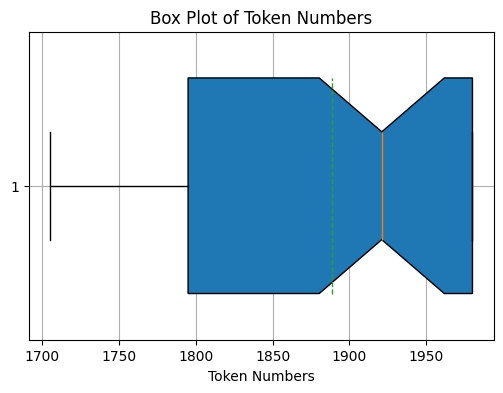

Mean: 1888.6274509803923
Standard Deviation: 84.51057731323472


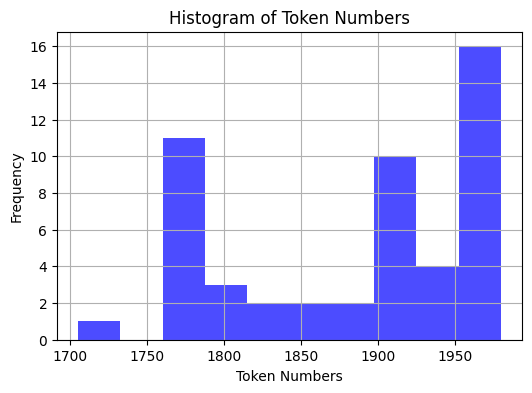

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Example token numbers

# Calculate the five-number summary
minimum = np.min(tokens_number)
q1 = np.percentile(tokens_number, 25)
median = np.median(tokens_number)
q3 = np.percentile(tokens_number, 75)
maximum = np.max(tokens_number)

# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(tokens_number, vert=False, patch_artist=True, notch=True, widths=0.7, meanline=True, showmeans=True)
plt.title('Box Plot of Token Numbers')
plt.xlabel('Token Numbers')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation
mean = np.mean(tokens_number)
std_dev = np.std(tokens_number)

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Create a histogram
plt.figure(figsize=(6, 4))
plt.hist(tokens_number, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Token Numbers')
plt.xlabel('Token Numbers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [118]:
max(tokens_number)

1980